In [173]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
pd.options.display.max_columns = None 
import sidetable

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Estandarización variables numéricas y Codificación variables categóricas
# ------------------------------------------------------------------------------
from sklearn.preprocessing import RobustScaler

# Gestión datos desbalanceados
# ------------------------------------------------------------------------------
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

# Para separar los datos en train y test
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split

#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


# Regresión Logística I. EDA.

1. Buscar un conjunto de datos a analizar. Se recomienda que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico.


In [174]:
df = pd.read_csv("../data/airlines.csv")
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


2. Explicar los datos y las variables disponibles en el conjunto de datos seleccionado


- `satisfaction` (*object*): Si el cliente está satisfecho o no. **Será nuestra variable respuesta**.

- `Gender` (*object*): El género del cliente. 

- `Customer Type` (*object*): Indica si el cliente es Loyal Customer (cliente recurrente) u otro tipo. 

- `Age` (*int64*): Edad del cliente.

- `Type of Travel` (*object*): Tipo de viaje realizado.

- `Class` (*object*): Clase en la que viaja el cliente.

- `Flight Distance` (*int64*): Distancia  del viaje.

- `Seat comfort` (*int64*): Comodidad del asiento.

- `Departure/Arrival time convenient`(*int64*): La conveniencia de los horarios de salida/llegada.

- `Food and drink` (*int64*): La satisfacción con la comida y la bebida.

- `Gate location` (*int64*): Ubicación de la puerta de embarque.

- `Inflight wifi service`(*int65*): La puntuación del wi-fi en el vuelo.

- `Inflight entertainment`(*int64*):La puntuación de los servicios de entretenimiento en el vuelo.

- `Online support`: La puntuación del soporte online de la compañía.

- `Ease of Online booking`(*int64*): Puntuación sobre la facilidad de reservar un vuelo.

- `On-board service` (*int64*): Puntuación del servicio a bordo.

- `Leg room service` (*int64*): Puntuación sobre el espacio de las piernas. 

- `Baggage handling`: Puntuación de la gestión del equipaje. 

- `Checkin service`(*int64*): Puntuación sobre el servicio de *check-in* de la aerolinea.

- `Cleanliness` (*int64*): Puntuación sobre la limpieza.

- `Online boarding`(*int64*): Puntuación sobre el servicio de embarque. 

- `Departure Delay in Minutes` (*int64*): Minutos de retraso de la salida vuelo.

- `Arrival Delay in Minutes` (*float64*): Minutos de retraso del aterrizaje vuelo.

3. Realizar un EDA sencillo poniendo en práctica los conocimientos adquiridos hasta el momento.


4. Interpretación de los resultados.

In [175]:
# Comprobamos el nº de filas y columnas. 
print(f"Tenemos {df.shape[0]} filas en nuestro dataframe y {df.shape[1]} columnas.")

Tenemos 129880 filas en nuestro dataframe y 23 columnas.


In [176]:
# Comprobamos el nombre de las columnas.
df.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [177]:
# Unificamos los nombres de las columnas para que sea más fácil trabajar con ellas.
columnas = {columna : columna.replace(" ", "_").lower() for columna in df.columns}
df.rename(columns=columnas, inplace = True)
df.head(1)

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure/arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0


In [178]:
# Cambiamos algunos nombres por otros más concisos.
columnas2 = {"departure/arrival_time_convenient" : "time_convenient",
             "inflight_wifi_service" : "wifi", "inflight_entertainment" : "entertainment",
            "ease_of_online_booking" : "online_booking", "departure_delay_in_minutes" : "departure_delay",
            "arrival_delay_in_minutes" : "arrival_delay"}

df.rename(columns=columnas2, inplace = True)
df.head(1)

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,time_convenient,food_and_drink,gate_location,wifi,entertainment,online_support,online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay,arrival_delay
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0


In [179]:
# Comprobamos si tenemos nulos y, como podemos ver, sólo tenemos en "arrival_delay".
df.stb.missing()

,missing,total,percent
arrival_delay,393,129880,0.302587
entertainment,0,129880,0.000000
departure_delay,0,129880,0.000000
online_boarding,0,129880,0.000000
cleanliness,0,129880,0.000000
checkin_service,0,129880,0.000000
baggage_handling,0,129880,0.000000
leg_room_service,0,129880,0.000000
on-board_service,0,129880,0.000000
online_booking,0,129880,0.000000


In [180]:
# Vamos a sustituir los nulos por la mediana. 
df["arrival_delay"].fillna(df["arrival_delay"].median(), inplace = True)

In [181]:
# Comprobamos si tenemos duplicados y no tenemos.
df.duplicated().sum()

0

In [182]:
# Cambiamos el tipo de columna de la variable respuesta, falsas numéricas y otras a "category".
columnas_categoria = ["satisfaction", "gender", "customer_type", "type_of_travel",
        "class", "seat_comfort", "time_convenient", "food_and_drink", "gate_location", "wifi", "entertainment",
        "online_support", "online_booking", "on-board_service",
        "leg_room_service", "baggage_handling", "checkin_service",
        "cleanliness", "online_boarding"]

for i in columnas_categoria:
    df[i] = df[i].astype("category")

In [183]:
# Comprobamos los estadísticos de las variables numéricas.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
flight_distance,129880.0,1981.409055,1027.115606,50.0,1359.0,1925.0,2544.0,6951.0
departure_delay,129880.0,14.713713,38.071126,0.0,0.0,0.0,12.0,1592.0
arrival_delay,129880.0,15.045465,38.416353,0.0,0.0,0.0,13.0,1584.0


In [184]:
# Creamos un dataframe solo con las variables numéricas.
numericas = df.select_dtypes(include = np.number)
numericas.head()

,age,flight_distance,departure_delay,arrival_delay
0,65,265,0,0.0
1,47,2464,310,305.0
2,15,2138,0,0.0
3,60,623,0,0.0
4,70,354,0,0.0


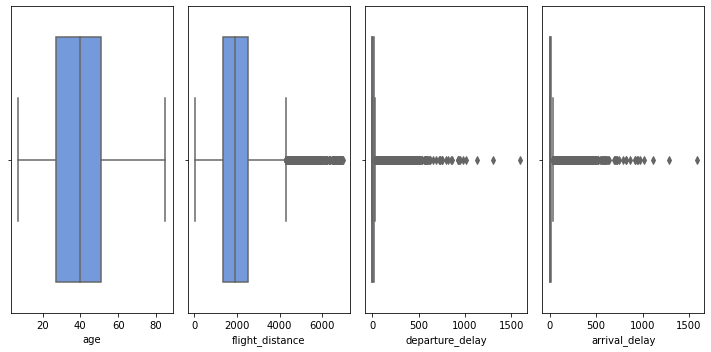

In [185]:
# Vamos a sacar los outliers
fig, axes = plt.subplots(1, 4, figsize=(10, 5))

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "cornflowerblue"); 
    
plt.tight_layout()
plt.show()

Tenemos muchísimos outliers en columnas como "flight_distance", "departure_delay" y "arrival_delay". No obstante, decidimos no gestionarlos, ya que consideramos que realmente son situaciones que pueden ocurrir. 

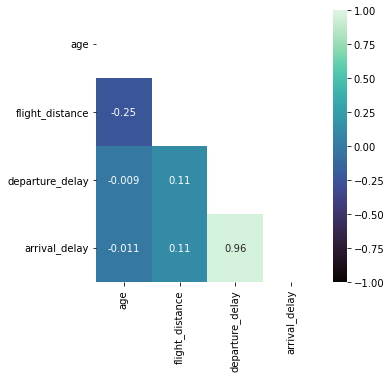

In [186]:
# Realizamos un heatmap para ver las correlaciones entre variables numéricas.
plt.figure(figsize = (5, 5))

mask = np.triu(np.ones_like(numericas.corr(), dtype = np.bool_))

sns.heatmap(numericas.corr(),
            vmin = -1, 
            vmax = 1,
            annot = True,
            mask = mask,
            cmap = "mako");

Como podemos ver, no hay apenas columnas que estén altamente correlacionadas. Solamente se encuentra una alta correlación positiva entre "departure_delay" y "arrival_delay", lo cual tiene sentido, ya que si un vuelo sale tarde, llegará tarde. Por tanto, decidimos eliminar "arrival_delay", puesto que no aporta nueva información. 

In [187]:
# Borramos la columna mencionada.
df.drop("arrival_delay", axis = 1, inplace = True)
df.head(1)

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,time_convenient,food_and_drink,gate_location,wifi,entertainment,online_support,online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0


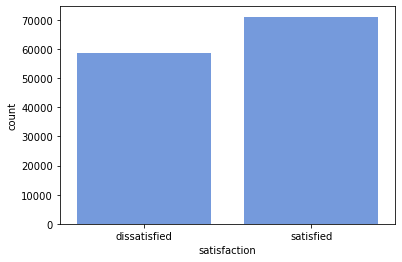

In [188]:
# Comprobamos la información que nos da la variable respuesta.
sns.countplot(x = "satisfaction", data = df, color = "cornflowerblue");

Hemos elegido la columna "satisfaction" como nuestra variable respuesta. Como se puede ver, es dicotómica, por lo que es perfecta para realizar una regresión logística. No obstante, vamos a tener que comprobar si hay problemas de balanceo, ya que podemos ver que no hay el mismo número de datos para cada una de las categorías. 

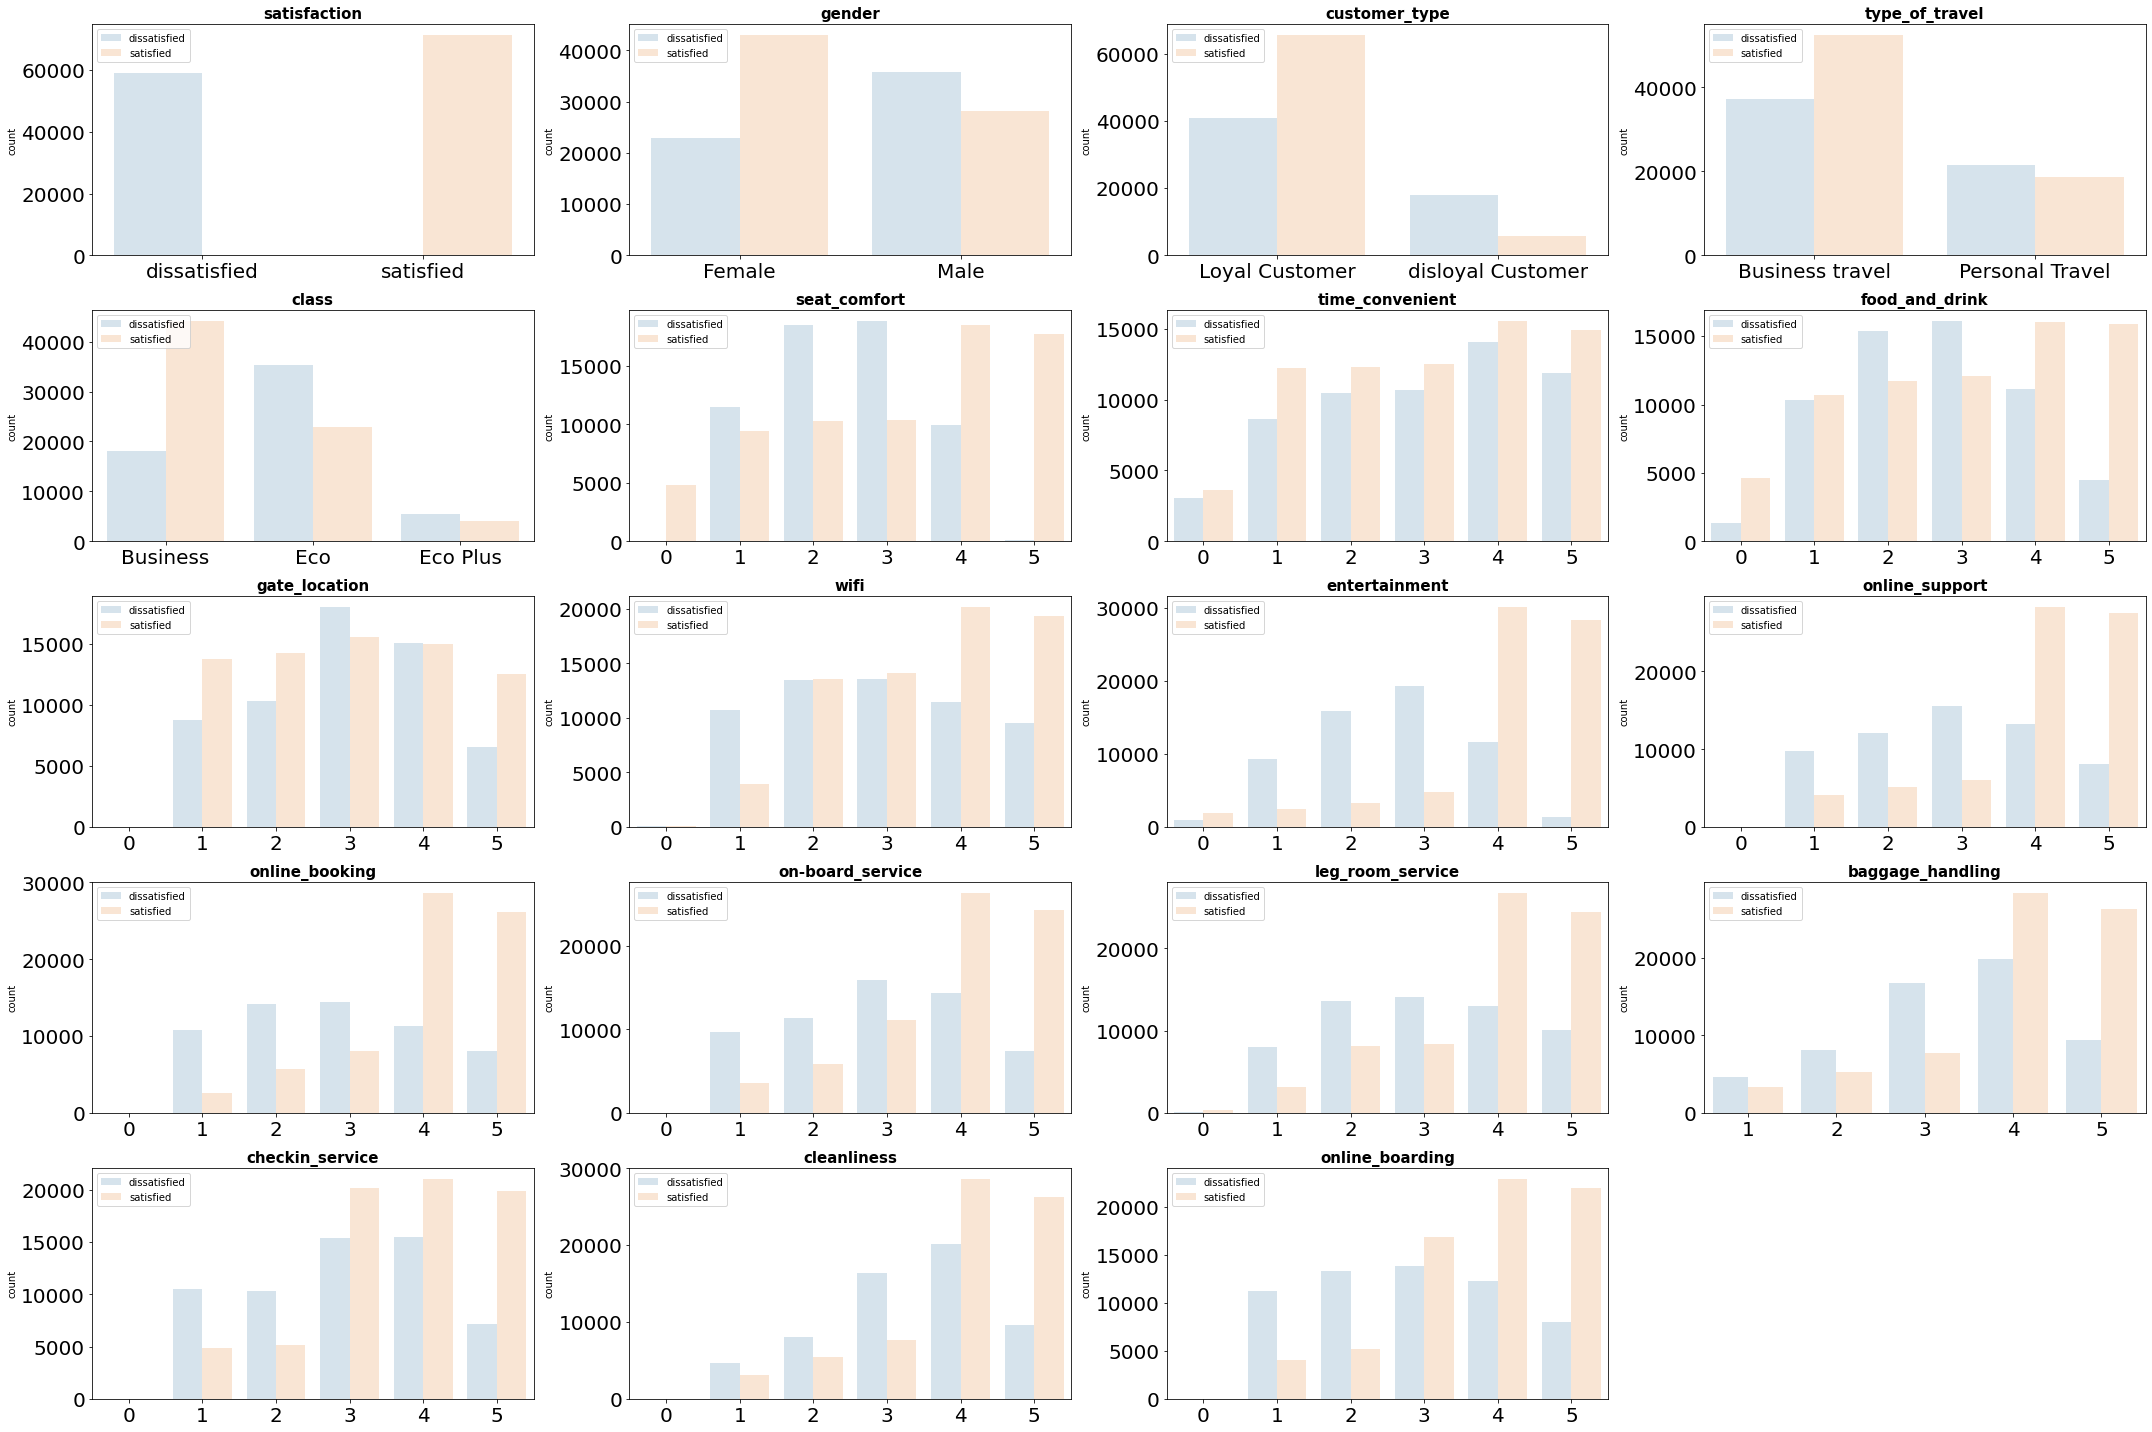

In [189]:
# Comprobamos la relación de las variables categóricas con nuestra variable respuesta.
fig, axes = plt.subplots(5, 4, figsize = (30, 20))

axes = axes.flat
categoricas = df.select_dtypes(include = "category").columns

for i, columna in enumerate(categoricas): 
    sns.countplot(
        data = df,
        x = columna,
        hue = "satisfaction",
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(columna, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].legend(loc = "upper left")


fig.delaxes(axes[-1])
fig.tight_layout();

Se puede ver que las mujeres suelen estar más satisfechas que los hombres. Por otro lado, los clientes recurrentes suelen estar más satisfechos que los no recurrentes, aparte de que son más. Además, cuando se realiza un viaje de negocios, las personas parecen estar más satisfechas que cuando el viaje es por motivos personales. Por último, las personas que viajan en *business* están más satisfechas que cuando viajan en *economy*. Por lo general, se puede apreciar que la mayoría de las puntuaciones en relación al viaje están entre 4 y 5, salvo en "gate_location", "checkin_service", "food_and_drinks" y "seat_comfort", ya que la mayoría está entre dos y tres. Se puede ver que, en la mayoría de las columnas que implican puntuaciones, estas parece estar relacionadas con si un pasajero está satisfecho o no con la experiencia en general. Por ejemplo, en "seat_comfort", cuando la puntación es de 5, no hay personas insatisfechas, mientras que si la puntuación es de 2 y 3, hay más personas insatisfechas. 

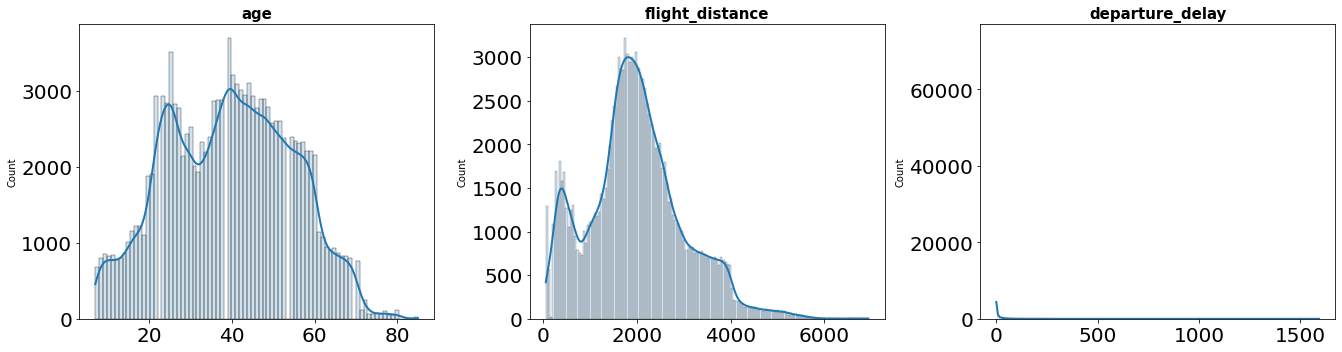

In [190]:
# Comprobamos la distribución de las variables numéricas.
fig, axes = plt.subplots(1, 4, figsize = (25, 5))

axes = axes.flat

for i, columna in enumerate(numericas): 
    sns.histplot(
        data = numericas,
        x = columna,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    axes[i].set_title(columna, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.delaxes(axes[-1]) # Quitamos la última porque es "delay_arrival" y la hemos borrado del dataframe original. 
fig.tight_layout();

Como se puede comprobar, el grueso de las edades está entre los 20 y los 50, aunque hay una bajada en torno a los 30 que puede coincidir con que las personas sobre esta edad suelen tener hijos pequeños o con que están empezando sus carreras profesionales, lo que limita su capacidad de viajar.

En cuanto a la distancia de los viajes, podemos diferenciar dos grupos que pueden ser viajes nacionales y viajes internacionales. 

En referente al retraso de salida de los vuelos, hay más vuelos que tienen 0 min de retraso, aunque se puede ver el resto de vuelos está muy repartido entre los que si tienen retraso.

In [191]:
# Guardamos el dataframe limpio.
df.to_csv("../data/airlines_limpio.csv")

# Regresión Lineal II. Preprocesado.

Usando el mismo dataset, los objetivos son:

1. Estandarizar las variables numéricas de vuestro set de datos


In [192]:
# Seleccionamos únicamente las variables predictoras numéricas.
numericas2 = df.select_dtypes(include = np.number)
numericas2.head(1)

,age,flight_distance,departure_delay
0,65,265,0


In [193]:
# Decidimos estandarizar nuestras variables numéricas con un RobustScaler porque no hemos tratado outliers.
robust = RobustScaler()

numericas3 = pd.DataFrame(robust.fit_transform(numericas2), columns = numericas2.columns)

for columna in numericas2.columns:
    print(f'La media de la columna {columna} es: {numericas2[columna].mean()}')
    print(f'La desviación estándar de la columna {columna} es: {numericas2[columna].std()}')

La media de la columna age es: 39.42795657530028
La desviación estándar de la columna age es: 15.119359950371694
La media de la columna flight_distance es: 1981.409054511857
La desviación estándar de la columna flight_distance es: 1027.115605613398
La media de la columna departure_delay es: 14.713712657838004
La desviación estándar de la columna departure_delay es: 38.07112621501086


In [194]:
# Unificamos los datos estandarizados en el dataframe.
df_robust = df.copy()

df_robust[numericas3.columns] = numericas3

df_robust.head(1)

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,time_convenient,food_and_drink,gate_location,wifi,entertainment,online_support,online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay
0,satisfied,Female,Loyal Customer,1.041667,Personal Travel,Eco,-1.400844,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0.0


2. Codificar las variables categóricas. Recordad que tendréis que tener en cuenta si vuestras variables tienen orden o no.


Hemos visto que todas nuestras variables predictoras categóricas tienen orden y, a continuación, vamos a codificarlas en base a ese orden.

In [195]:
orden_satisfaction = {"satisfied": 0, "dissatisfied": 1}

orden_gender = {"Female" : 0, "Male" : 1}

orden_cust_type = {"Loyal Customer" : 0, "disloyal Customer" : 1}

orden_travel = {"Business travel" : 0, "Personal Travel" : 1}

orden_class =  {"Business" : 0, "Eco Plus" : 1, "Eco" : 2}

orden_seat = {0 : 0,  5 : 0, 4 : 1, 1 : 2, 2 : 3, 3 : 3}

orden_convenient = {0 : 0, 1: 1, 2 : 2, 3 : 2, 4 : 3, 5 : 3}

orden_food = {0 : 0, 5 : 1, 4: 2, 1 : 3, 2 : 4, 3 : 4}

orden_gate = {0 : 0, 1: 1, 2 : 1, 5 : 1, 4 : 2, 3 : 3}

orden_wifi = {0 : 0, 4 : 1, 5 : 1, 2 : 2, 3 : 2, 1 : 3}

orden_entertainment = {5 : 0, 4 : 1, 0 : 2, 1 : 2, 2 : 2, 3 : 2}

orden_support = {0 : 0, 4 : 1, 5 : 1, 1: 2, 2 : 2, 3 : 2}

orden_baggage = {4 : 0, 5 : 0, 1 : 1, 2 : 2, 3 : 2}

orden_checkin = {0: 0, 3 : 1, 4 :1 , 5 : 1, 1 : 2, 2 : 2}

In [196]:
# Creamos un diccionario con cada una de las variables categóricas para realizar la codificación de manera más automatizada.
diccionario_map = {
    "satisfaction": orden_satisfaction,
    "gender": orden_gender,
    "customer_type": orden_cust_type,
    "type_of_travel": orden_travel,
    "class": orden_class,
    "seat_comfort": orden_seat,
    "time_convenient": orden_convenient,
    "food_and_drink": orden_food,
    "gate_location": orden_gate,
    "wifi": orden_wifi,
    "entertainment": orden_entertainment,
    "online_support": orden_support,
    "online_booking": orden_support,
    "on-board_service": orden_support,
    "leg_room_service": orden_support,
    "cleanliness": orden_support,
    "baggage_handling": orden_baggage,
    "checkin_service": orden_checkin,
    "online_boarding": orden_checkin}

for columna, orden in diccionario_map.items():
    df_robust[columna] = df_robust[columna].map(orden)

In [197]:
# Codificamos también el dataframe sin estandarizar.
for columna, orden in diccionario_map.items():
    df[columna] = df[columna].map(orden)

3. Chequear si vuestros datos están balanceados. En caso de que no lo estén utilizad algunas de las herramientas aprendidas en la lección para balancearlos.


In [198]:
# Comprobamos el nº de datos que tenemos para cada uno de los valores de nuestra variable respuesta.
df["satisfaction"].value_counts()

0    71087
1    58793
Name: satisfaction, dtype: int64

In [199]:
# Comprobamos el porcentaje de cada uno de esos valores.
print(f"El porcentaje de satisfechos es {(df['satisfaction'].value_counts()[0] * 100 / df.shape[0]).round(1)}")
print(f"El porcentaje de no satisfechos es {(df['satisfaction'].value_counts()[1] * 100 / df.shape[0]).round(1)}")

El porcentaje de satisfechos es 54.7
El porcentaje de no satisfechos es 45.3


Al haber menos de un 10% de diferencia entre las categorías de nuestra variable respuesta, decidimos que no es necesario balancearlas. 

4. Guardad el dataframe con los cambios que habéis aplicado para utilizarlo en la siguiente lección.

In [200]:
# Guardamos ambos dataframes: el estandarizado y el sin estandarizar para poder realizar el modelo de ambos.
df_robust.to_csv("../data/airlines_estand.csv")
df.to_csv("../data/airlines_no_estand.csv")